In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from pitch_utils import load_and_correct_trials, normalize_trials_per_trial
from pitch_rocket_utils import (
    SENSOR_COLS, create_minirocket_pipeline, prepare_windowed_data,
    get_rolling_predictions, plot_rolling_classification
)

In [12]:
# Load and normalize data
pitch_good_raw = load_and_correct_trials("pitch/good")
pitch_bad_raw = load_and_correct_trials("pitch/bad")

pitch_good = normalize_trials_per_trial(pitch_good_raw, SENSOR_COLS)
pitch_bad = normalize_trials_per_trial(pitch_bad_raw, SENSOR_COLS)

print(f"Loaded {len(pitch_good)} good trials, {len(pitch_bad)} bad trials (per-trial normalized)")

Loaded 20 good trials, 11 bad trials (per-trial normalized)


In [ ]:
# Prepare windowed data and train
data = prepare_windowed_data(pitch_good, pitch_bad, window_size=256, stride=64)

pipe = create_minirocket_pipeline()
pipe.fit(data['X_train'], data['y_train'])

Created 185 windows from 16 trials
Created 80 windows from 8 trials
Created 47 windows from 4 trials
Created 30 windows from 3 trials


c:\Users\TonyZheng\miniconda3\envs\baseball\Lib\site-packages\sktime\transformations\base.py:515: UserWarning: X is of equal length, consider using MiniRocketMultivariate for speedup and stability instead.
  self._fit(X=X_inner, y=y_inner)


Train acc: 1.000
Test acc:  0.857


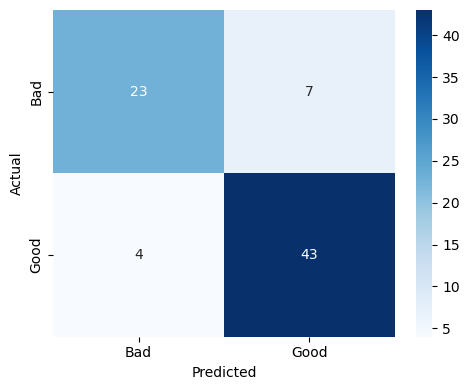

              precision    recall  f1-score   support

         Bad       0.85      0.77      0.81        30
        Good       0.86      0.91      0.89        47

    accuracy                           0.86        77
   macro avg       0.86      0.84      0.85        77
weighted avg       0.86      0.86      0.86        77



In [14]:
# Confusion matrix
y_pred = pipe.predict(data['X_test'])
cm = confusion_matrix(data['y_test'], y_pred)

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

print(classification_report(data['y_test'], y_pred, target_names=['Bad', 'Good']))

Created 12 windows from 1 trials
Created 13 windows from 1 trials
Created 11 windows from 1 trials
Created 11 windows from 1 trials
Created 10 windows from 1 trials
Created 8 windows from 1 trials
Created 12 windows from 1 trials


c:\Users\TonyZheng\Desktop\baseball_data\pitch_rocket_utils.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


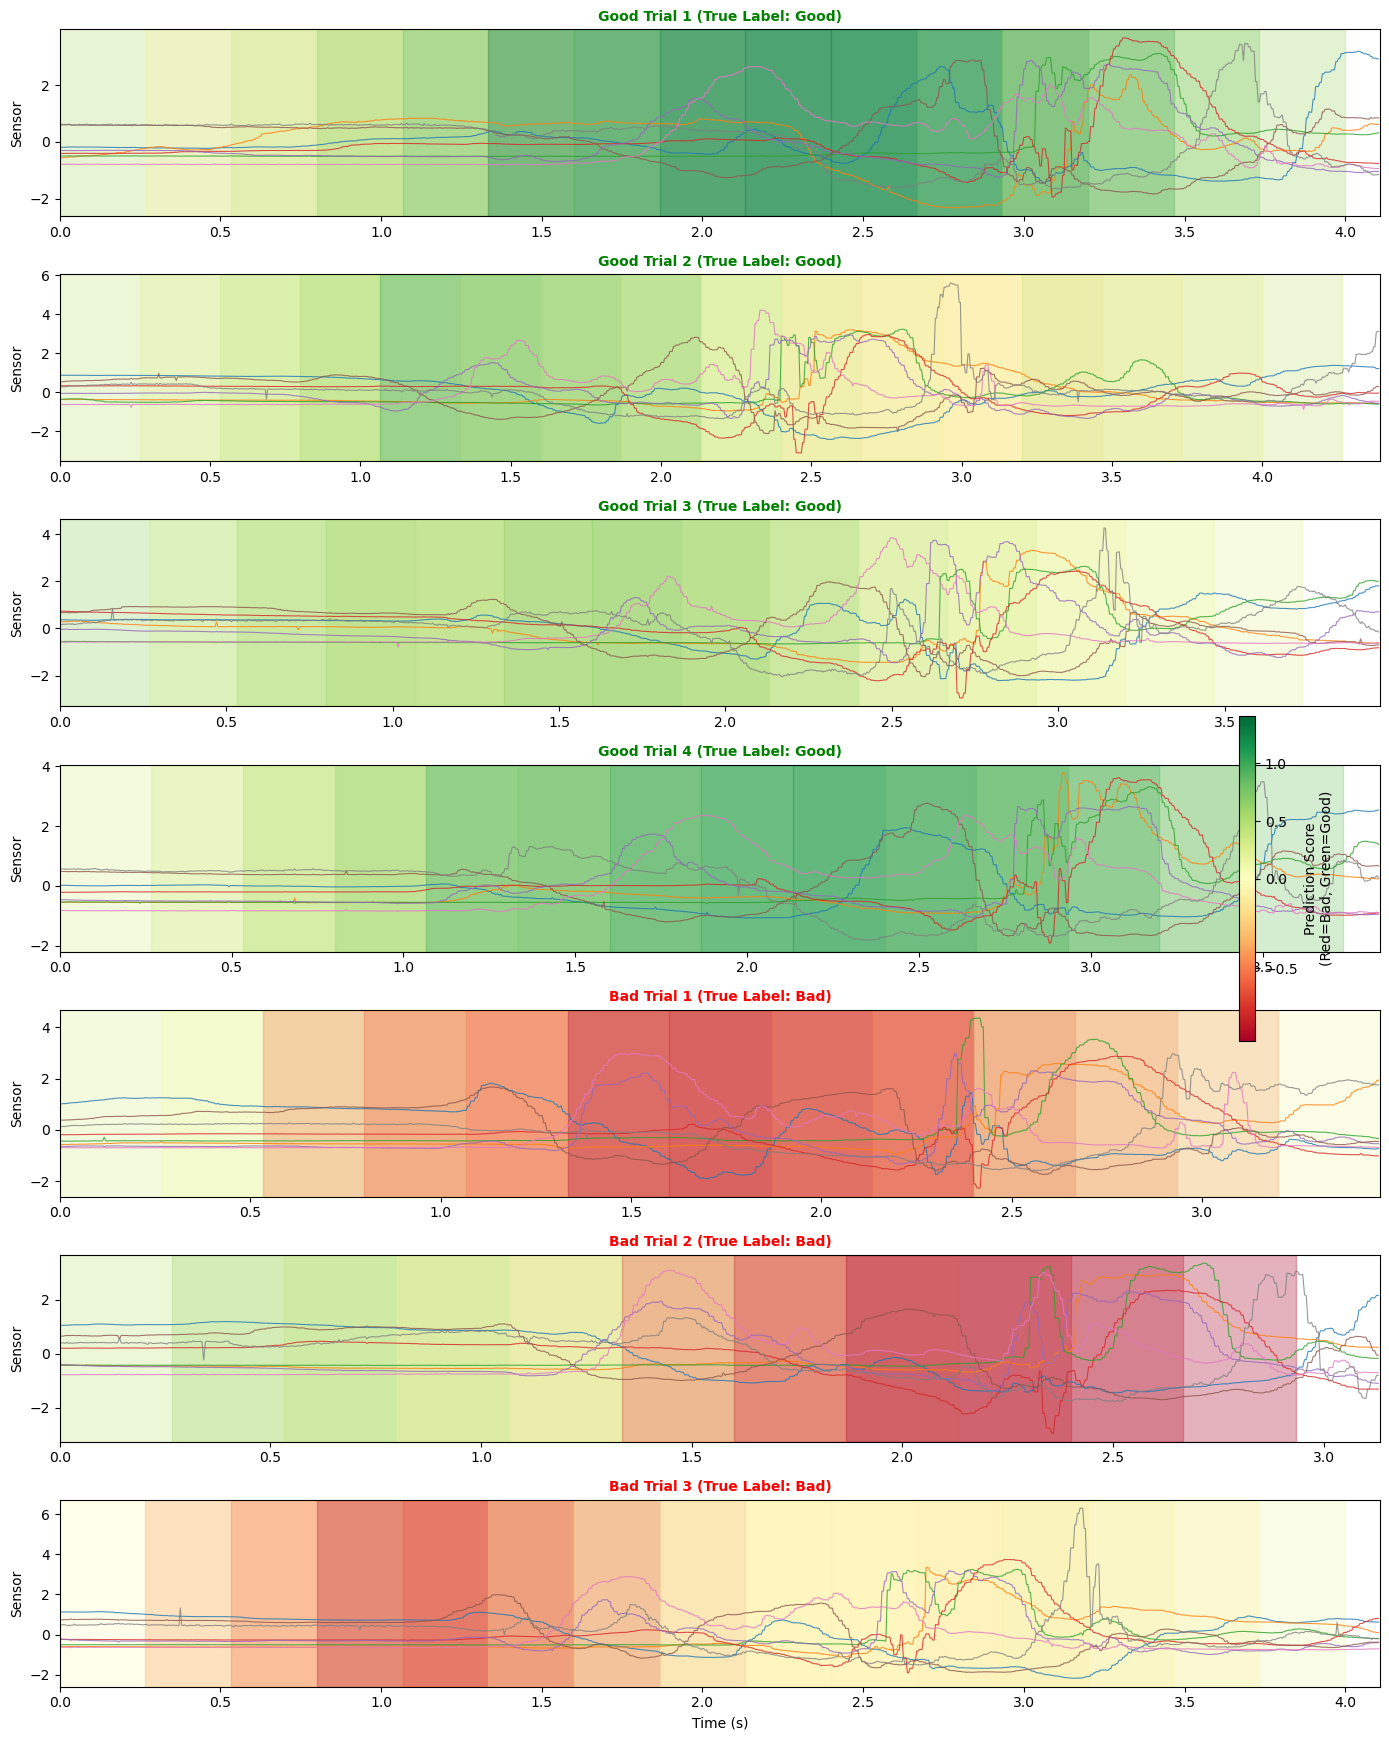

In [16]:
# Rolling classification visualization
good_results = get_rolling_predictions(data['good_test'], pipe)
bad_results = get_rolling_predictions(data['bad_test'], pipe)

plot_rolling_classification(data['good_test'], data['bad_test'], good_results, bad_results)
plt.show()